# Анализ рекламы развлекательного приложения

*Учебный проект Яндекс Практикума по теме «Анализ бизнес-показателей»*

**Цель:** выявив причины убытков, сформулировать предложения для корректировки рекламной стратегии.

Данные: 
- записи о посещениях и покупках пользователей с 1 мая по 27 октября 2019 г., 
- записи о рекламных расходах.

Заказчик: отдел маркетинга

**Задачи:**
- определить источники привлечения пользователей и типы их устройств,
- рассчитать стоимость привлечения пользователей из различных рекламных каналов,
- рассчитать LTV, CAC и ROI в целом и по когортам,
- выявить факторы, влияющие на привлечение клиентов.

## Оглавление
1. Обзор данных
    * 1.1 пропуски
    * 1.2 типы данных
    * 1.3 дубликаты
    * 1.4 вывод
2. Определение функций
    * 2.1 для вычисления метрик
    * 2.2 для построения графиков
3. Анализ пользовательских профилей
    * 3.1 когорты по странам
    * 3.2 когорты по использованию устройств
    * 3.3 когорты по каналам привлечения
    * 3.4 вывод
4. Оценка маркетинговой политики
    * 4.1 стоимость каналов привлечения
    * 4.2 изменение расходов во времени
    * 4.3 динамика CAC
    * 4.4 вывод
5. Оценка окупаемости рекламы: LTV, CAC, ROI
    * 5.1 общие графики
    * 5.2 по устройствам
    * 5.3 по странам
    * 5.4 по каналам привлечения
    * 5.5 вывод
6. Конверсия и удержание
    * 6.1 общая конверсия
    * 6.2 конверсия по когортам
    * 6.3 общее удержание
    * 6.4 удержание по когортам
    * 6.5 вывод
7. Уточняющие сопоставления
    * 7.1 сопоставление США–Европа
    * 7.2 связь «регион — канал привлечения»
    * 7.3 вывод
8. Итог

## 1 Обзор данных

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from matplotlib import pyplot as plt

pd.set_option('mode.chained_assignment', None)

Откроем датасеты и сохраним данные в переменных.

In [2]:
visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),
    pd.read_csv('orders_info_short.csv'),
    pd.read_csv('costs_info_short.csv'),
    )
    
display(visits.head())
display(orders.head())
costs.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Выведем информацию о данных.

In [3]:
display(visits.info())
display(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### 1.1 пропуски

Проверим данные на наличие пропусков.

In [4]:
display(visits.isna().sum())
display(orders.isna().sum())
costs.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

User Id     0
Event Dt    0
Revenue     0
dtype: int64

dt         0
Channel    0
costs      0
dtype: int64

### 1.2 типы данных

Переименуем названия столбцов.

In [5]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

Преобразуем данные о времени.

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
#costs['date'] = pd.to_datetime(costs['dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

### 1.3 дубликаты

Проверим на наличие дубликатов.

In [7]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
costs.duplicated().sum()

0

0

0

### 1.4 вывод

Произведена следующая предобработка данных:
- переименование столбцов,
- преобразование типов данных в столбцах с датами, 
- выполнена проверка на дубликаты и пропуски.

## 2 Определение функций

### 2.1 для вычисления метрик

Функция для создания профилей.

In [8]:
def get_profiles(visits, orders, costs):

    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({
            'session_start': 'first', 
            'channel': 'first',
            'region': 'first',
            'device': 'first'
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
    
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles 

Функция для подсчета Retention Rate.

In [9]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    retention_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    retention_raw = retention_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    
    retention_raw['lifetime'] = (
        retention_raw['session_start'] - retention_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    retention = group_by_dimensions(retention_raw, dimensions, horizon_days)

    retention_hist = group_by_dimensions(retention_raw, dimensions + ['dt'], horizon_days)

    return retention_raw, retention, retention_hist 

Функция для расчета конверсии.

In [10]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    conversion_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    conversion_raw = conversion_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    conversion_raw['lifetime'] = (
        conversion_raw['event_dt'] - conversion_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        conversion_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    conversion = group_by_dimensions(conversion_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    conversion_hist = group_by_dimensions(conversion_raw, dimensions + ['dt'], horizon_days)

    return conversion_raw, conversion, conversion_hist 

Функция для расчета LTV и ROI.

In [11]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    ltv, roi = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions:
        dimensions = []

    ltv_hist, roi_hist = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    return result_raw, ltv, ltv_hist, roi, roi_hist 

### 2.2 для построения графиков

Функция для сглаживания данных.

In [12]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Функция для построения графика Retention Rate.

In [13]:
def plot_retention(retention, retention_hist, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    retention_hist = retention_hist.drop(columns=['cohort_size'])[[horizon - 1]]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_hist.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_hist.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_hist.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show() 

Функция для построения графика конверсии.

In [14]:
def plot_conversion(conversion, conversion_hist, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_hist = conversion_hist.drop(columns=['cohort_size'])[[horizon - 1]]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [name for name in conversion_hist.index.names if name not in ['dt']]
    filtered_data = conversion_hist.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Функция для визуализации LTV и ROI.

In [15]:
def plot_ltv_roi(ltv, ltv_hist, roi, roi_hist, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_hist = ltv_hist.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_hist = roi_hist[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_hist = roi_hist.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_hist.index.names if name not in ['dt']]
    filtered_data = ltv_hist.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_hist.index.names if name not in ['dt']]
    filtered_data = cac_hist.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_hist.index.names if name not in ['dt']]
    filtered_data = roi_hist.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## 3 Анализ пользовательских профилей

Создадим таблицу профилей пользователей. Определим минимальную и максимальную даты привлечения.

In [16]:
profiles = get_profiles(visits, orders, costs)

print('Минимальная дата:', profiles['dt'].min())
print('Максимальная дата:', profiles['dt'].max())

Минимальная дата: 2019-05-01
Максимальная дата: 2019-10-27


### 3.1 когорты по странам

In [17]:
(profiles
    .groupby('region')
    .agg({'user_id':'nunique', 'payer':'mean'})
    .rename(columns={'payer': 'payer_share'})
    .sort_values(by='payer_share', ascending=False)
)

,user_id,payer_share
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


Две трети пользователей — из США, при этом доля покупателей тоже самая высокая среди пользователей США.

### 3.2 когорты по использованию устройств

In [18]:
(profiles
    .groupby('device')
    .agg({'user_id':'nunique', 'payer':'mean'})
    .rename(columns={'payer': 'payer_share'})
    .sort_values(by='payer_share', ascending=False)
)

,user_id,payer_share
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


Группа клиентов с устройствами iPhone значительно больше, чем группы, использующие остальные устройства. При этом клиенты с устройствами Mac и iPhone примерно на 1% чаще становятся покупателями, что очень существенно в относительном сопоставлении.

### 3.3 когорты по каналам привлечения

In [19]:
(profiles
    .groupby('channel')
    .agg({'user_id':'nunique', 'payer':'mean'})
    .rename(columns={'payer': 'payer_share'})
    .sort_values(by='payer_share', ascending=False)
)

,user_id,payer_share
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


Наиболее обширные рекламные каналы привлечения — *FaceBoom* и *TipTop*. Канал *FaceBoom* также показывает самую большую долю покупателей. Еще 3 эффективных канала — *AdNonSense*, *lambdaMediaAds* и тот же *TipTop*, но здесь он уже на 4-м месте.

### 3.4 вывод

1. Минимальная и максимальная даты привлечения пользователей в имеющейся базе: с 1 мая по 27 октября 2019 года.

2. Большинство пользователей — из США, их доля в 2 раза больше, чем суммарное количество всех остальных пользователей. Самая высокая доля покупателей — тоже среди пользователей США, около 7%, что почти на 3% больше, чем во всех других регионах. 

3. Самый большой канал привлечения — органический: треть пользователей. Из рекламных каналов наиболее обширные — *Faceboom* и *TipTop*. Наиболее эффективные каналы (по доле покупателей) — *Faceboom*, *AdNonSense*, *lambdaMediaAds* и *TipTop*.

## 4 Оценка маркетинговой политики

### 4.1 стоимость каналов привлечения

Подсчитаем общую сумму расходов на маркетинг.

In [20]:
round(costs['costs'].sum(), 2)

105497.3

Выведем таблицу с общими тратами на каждый канал привлечения пользователей.

In [21]:
(costs
    .groupby('channel')
    .agg({'costs':'sum'})
    .sort_values(by='costs', ascending=False)
)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Два источника выделяются значительно: *ТipTop* и *FaceBoom*. В целом это соответствует картине, полученной ранее — те же самые два канала-лидера по привлечению пользователей. Однако расходы на *ТipTop* в 1,5 раза выше, а пользователей привлечено, наоборот в 1,5 раза меньше.

### 4.2 изменение расходов во времени

Посмотрим на динамику расходов на рекламу за весь период по неделям и по месяцам.

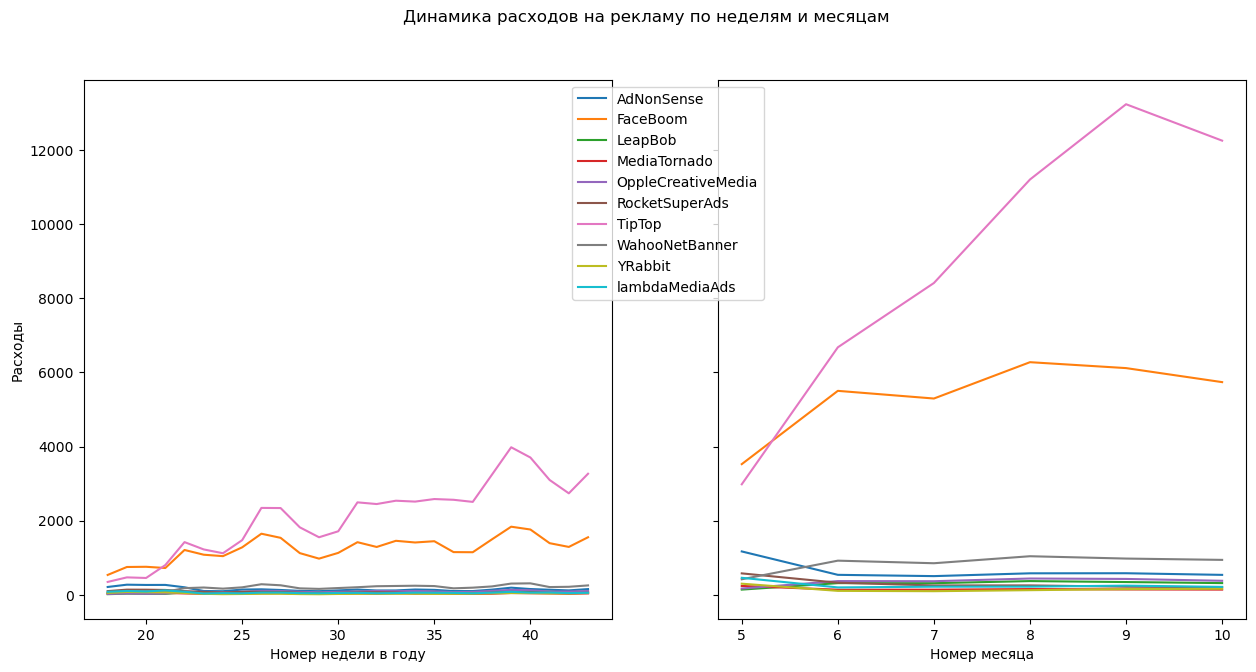

In [22]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

plt.figure(figsize=(15, 7))
plt.suptitle('Динамика расходов на рекламу по неделям и месяцам')

ax1=plt.subplot(1, 2, 1)
costs.pivot_table(index='week',columns='channel', values='costs', aggfunc='sum').plot(ax=ax1, legend=False)
plt.ylabel('Расходы')
plt.xlabel('Номер недели в году')

ax2=plt.subplot(1, 2, 2, sharey=ax1)
costs.pivot_table(index='month',columns='channel', values='costs', aggfunc='sum').plot(ax=ax2)
plt.xlabel('Номер месяца')
plt.legend(bbox_to_anchor=(0.1, 1))

plt.show()

Графики подтверждают, что выделяется 2 основных канала с наибольшими расходами на рекламу. Однако при этом расходы на канал *FaceBoom* в течение всего периода остаются высокими, но стабильными, а на канал *TipTop*, начиная с июня, примерно с 26 недели года, расходы непрерывно растут и к концу периода превышают расходы на *FaceBoom* в 2 раза.

###  4.3 динамика CAC

Выведем среднюю стоимость привлечения клиента за весь период.

In [23]:
cac_avg = profiles.query('channel != "organic"')['acquisition_cost'].mean()

print('Средняя стоимость привлечения пользователя из платных источников:', round(cac_avg, 2))

Средняя стоимость привлечения пользователя из платных источников: 1.13


А также посмотрим на среднюю стоимость привлечения клиента по каждому платному каналу.

In [24]:
(profiles
 .query('channel != "organic"')
 .pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
 .sort_values(by='acquisition_cost', ascending=False)
)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Средняя стоимость привлечения из канала *TipTop* более, чем в 2 раза превышает общую среднюю стоимость привлечения.

Посмотрим на изменение САС во времени по каждому источнику.

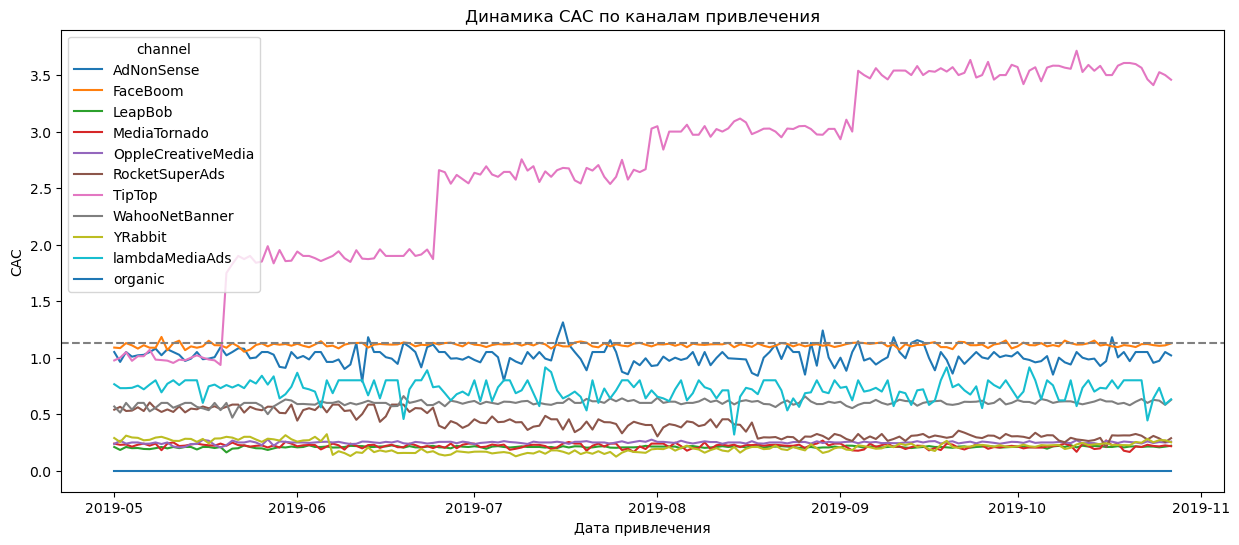

In [25]:
profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean').plot(figsize=(15, 6))
plt.title('Динамика САС по каналам привлечения')
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.axhline(round(cac_avg, 2), linestyle='--', color='grey');

Показатели САС почти по всем каналам остаются стабильными в течение всего периода наблюдения. Из общей картины 2 исключения: САС по каналу *RocketSuperAds* плавно снижается в течение всего периода, САС по каналу *TipTop* ступенчато растет начиная с июня с шагом примерно в месяц.

### 4.4 вывод

Самый дорогой канал привлечения — *TipTop*. Расходы на него составляют более половины всего бюджета. В динамике расходы на источник *TipTop* показывают непрерывный рост, тогда как расходы на другие каналы остаются на одном уровне. САС по каналу *TipTop* также растет с каждым месяцем. 

Второй канал по объему затрат на рекламу — *FaceBoom* — показывает стабильно более высокие расходы, чем на другие источники, однако САС пользователей из этого источника сопоставим с показателями остальных каналов и остается на одном уровне в течение всего периода.

В плане динамики также можно обратить внимание на источник *RocketSuperAds*, САС по которому плавно снижается в течение всего периода.

## 5 Оценка окупаемости рекламы: LTV, CAC, ROI

Зададим момент и горизонт анализа. В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

In [26]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Для дальнейшего анализа добавим фильтр, отсеивающий «органических» пользователей.

In [27]:
profiles = profiles.query('channel != "organic"')

###  5.1 общие графики

Построим вначале графики LTV, CAC и ROI без деления на когорты.

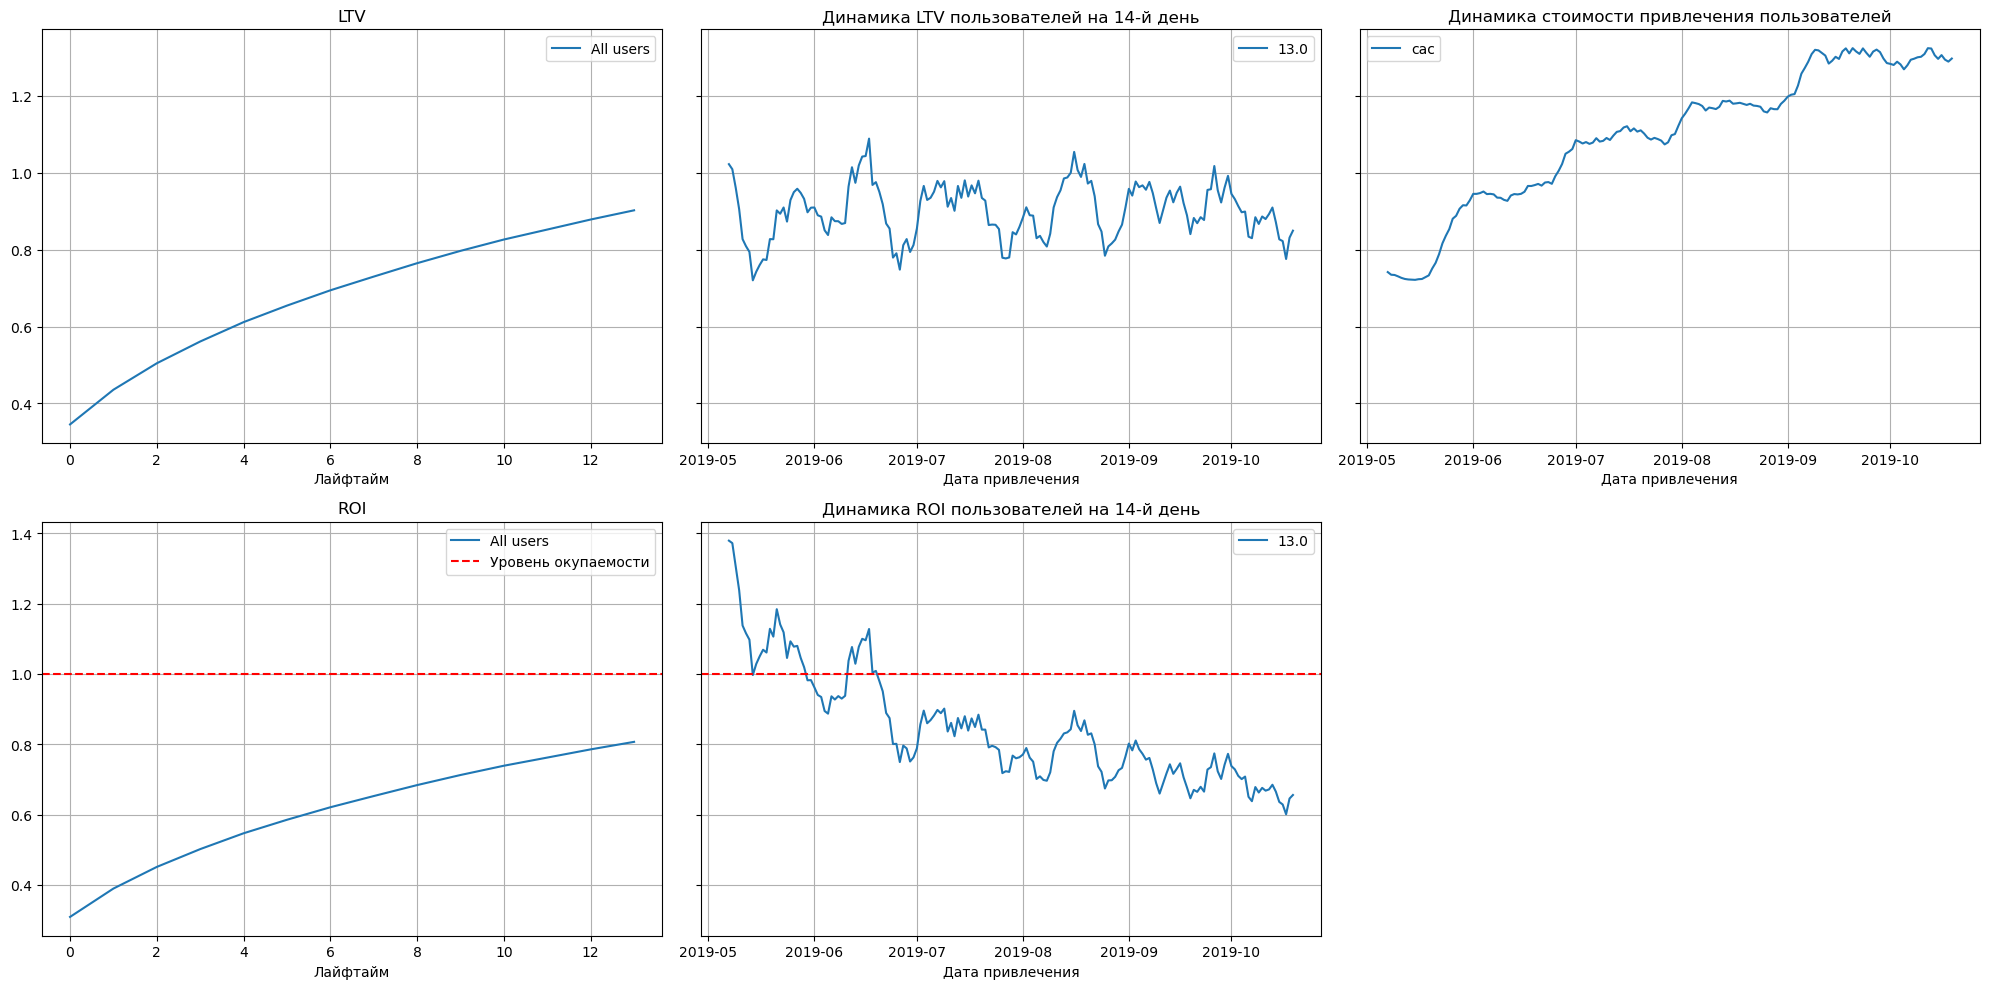

In [28]:
ltv_raw, ltv, ltv_hist, roi, roi_hist = get_ltv(profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv, ltv_hist, roi, roi_hist, horizon_days)

График LTV показывает нормальный рост. Динамика LTV показывает колебания с периодом примерно в месяц, но в целом показатели не опускаются ниже определенных границ. То есть клиенты приносят деньги стабильно и проблема заключается не в привлечении покупателей.

График САС показывает резкий рост в июне (в 1,5 раза), и дальше увеличение стоимости продолжается, хоть и с меньшими темпами. К концу периода стоимость привлечения одного клиента вырастает в 2 раза по сравнению с начальным.

Показатели ROI демонстрируют, что в итоге реклама не окупается. К концу второй недели окупаемость составляет лишь 80%. Динамика ROI также показывает, что проблемы начинаются в июне. В июле за счет колебания еще есть окупаемость, но дальше идет непрерывное снижение.

###  5.2 по устройствам

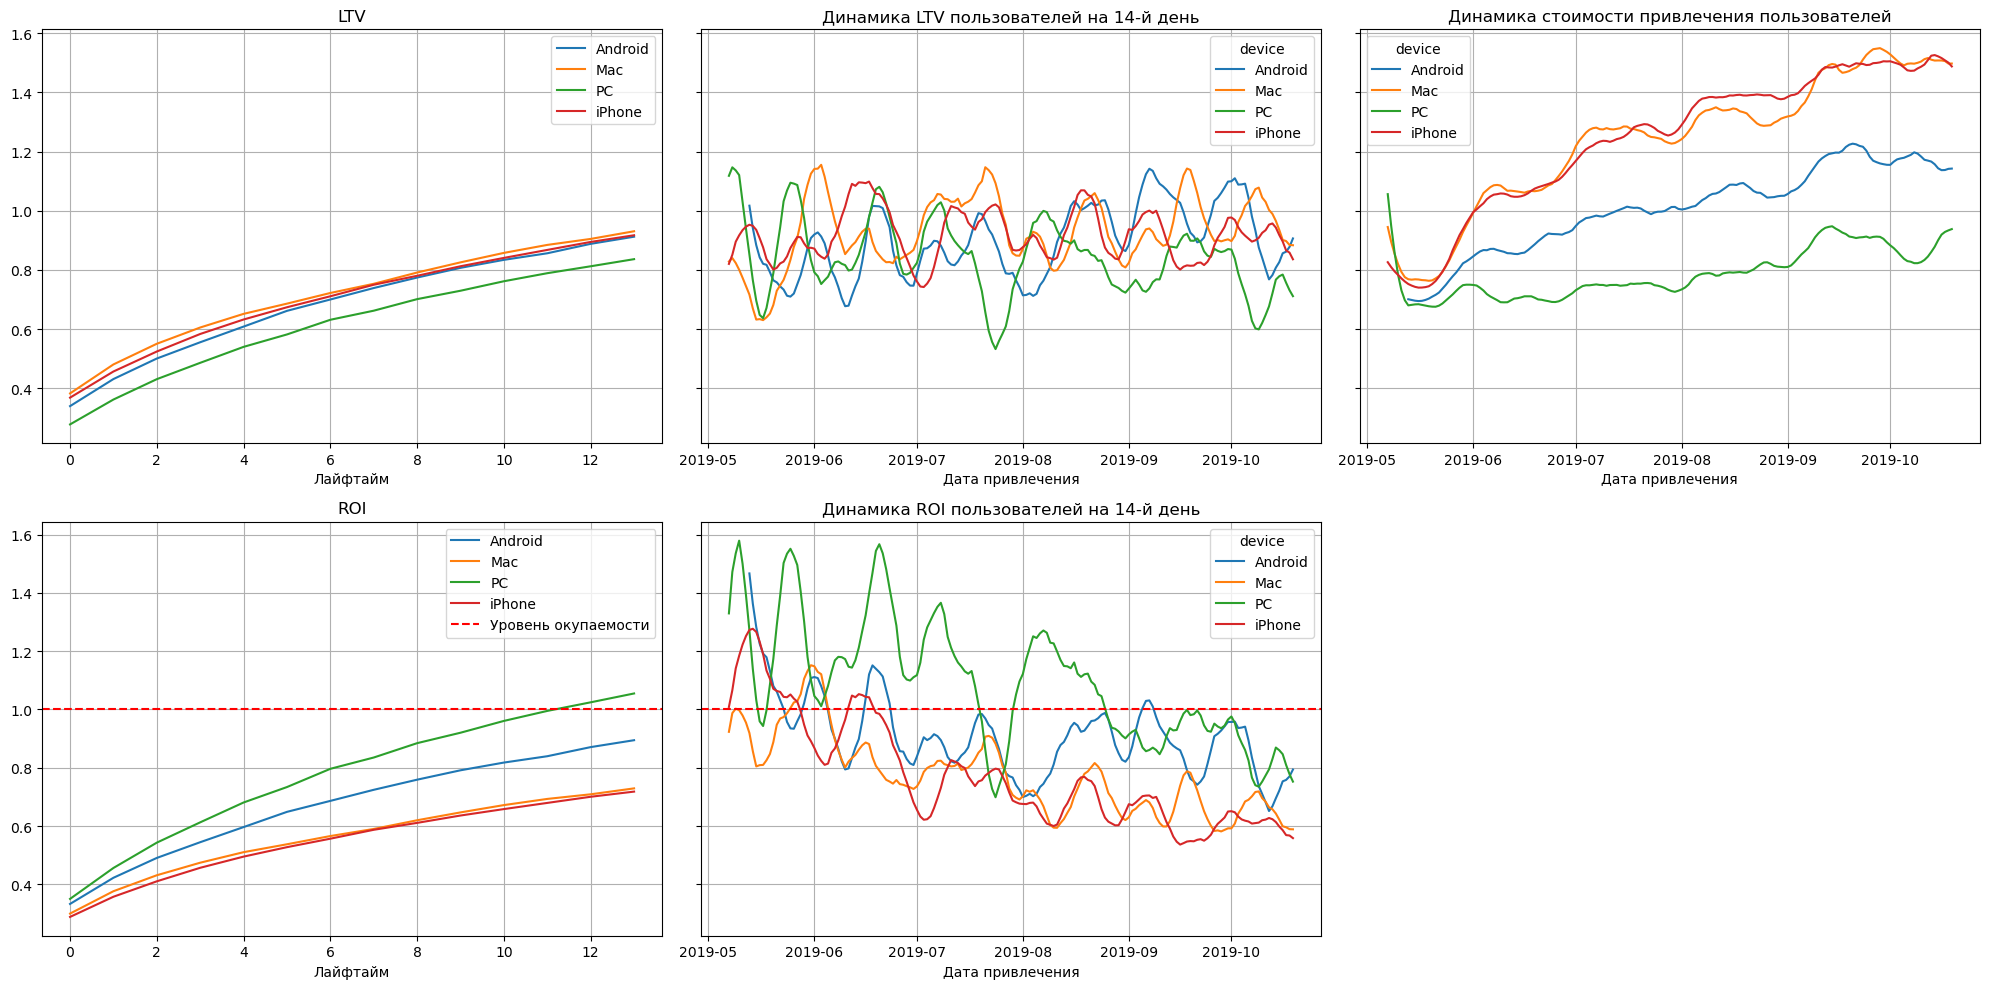

In [29]:
dimensions = ['device']

ltv_raw, ltv, ltv_hist, roi, roi_hist = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv, filter_data(ltv_hist, 7), roi, filter_data(roi_hist, 7), horizon_days)

LTV пользователей в целом сопоставимы, чуть ниже у пользователей *PC*, но не критичным образом. Динамика LTV тоже сопоставима на всех устройствах и начиная с июня держится примерно в одних и тех же пределах.

CAC показывает рост для пользователей всех устройств, но для *Mac* и *iPhone* намного выше. 

В итоге окупаемость показывают только пользователи с устройствами *PC*. Пользователи *Mac* и *iPhone* не выходят на уровень окупаемости. Показатели пользователей *Android* лучше, но также не выходят на окупаемость.

В динамике ROI видно, что даже после проблем, начавшихся в июне, пользователи *PC* некоторое время продолжали окупаться. Сильнее всего июньская проблема повлияла на окупаемость пользователей *Mac* и *iPhone*.

### 5.3 по странам

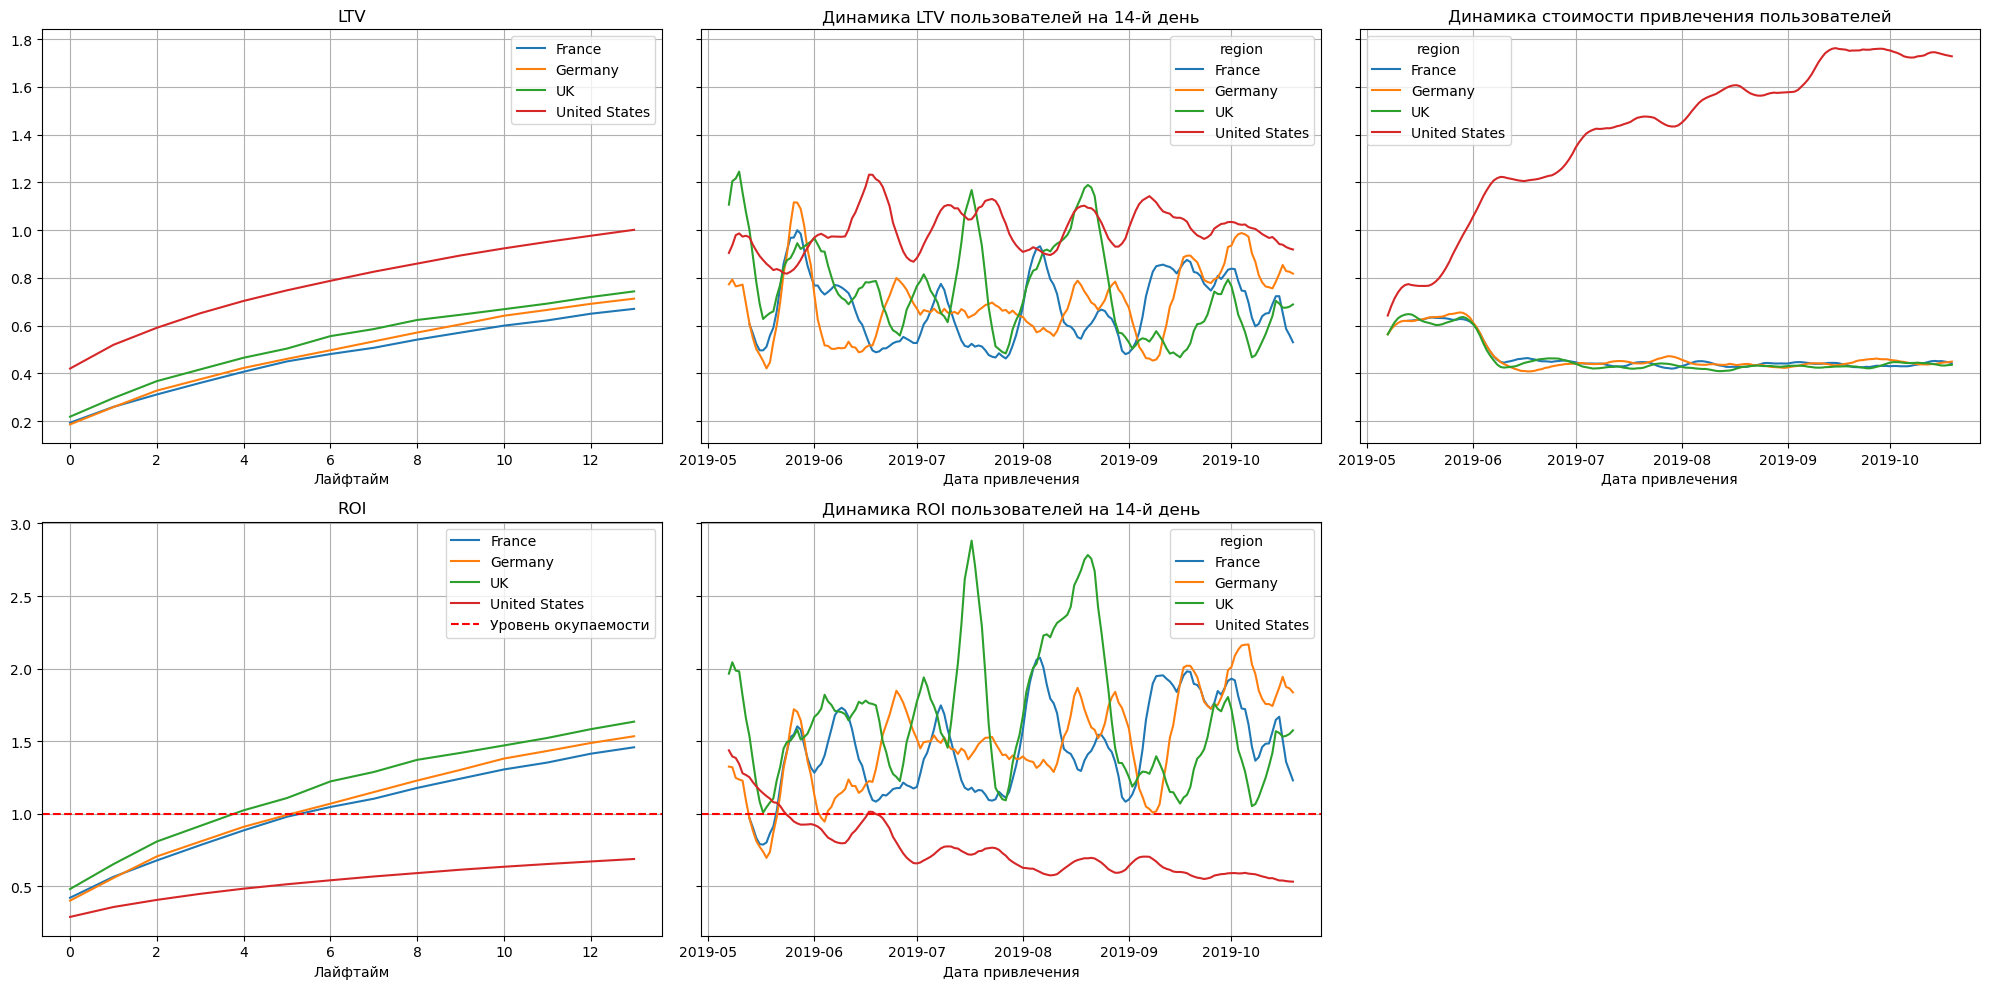

In [30]:
dimensions = ['region']

ltv_raw, ltv, ltv_hist, roi, roi_hist = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv, filter_data(ltv_hist, 7), roi, filter_data(roi_hist, 7), horizon_days)

Пользователи США показывают стабильно более высокий LTV в целом. В динамике тоже видим, что LTV к концу второй недели у пользователей США не только находится на более высоком уровне, но и меньше подвержен колебаниям.

Однако график CAC показывает, что июньская проблема коснулась только пользователей США. Для клиентов из остальных регионов стоимость привлечения даже снизилась.

Соответственно, пользователи всех регионов, кроме США продолжают окупаться, причем уже на 5-й день. В динамике — с колебаниями, но в одних и тех же пределах. Пользователи США не окупаются, проблема началась в июне.

### 5.4 по каналам привлечения

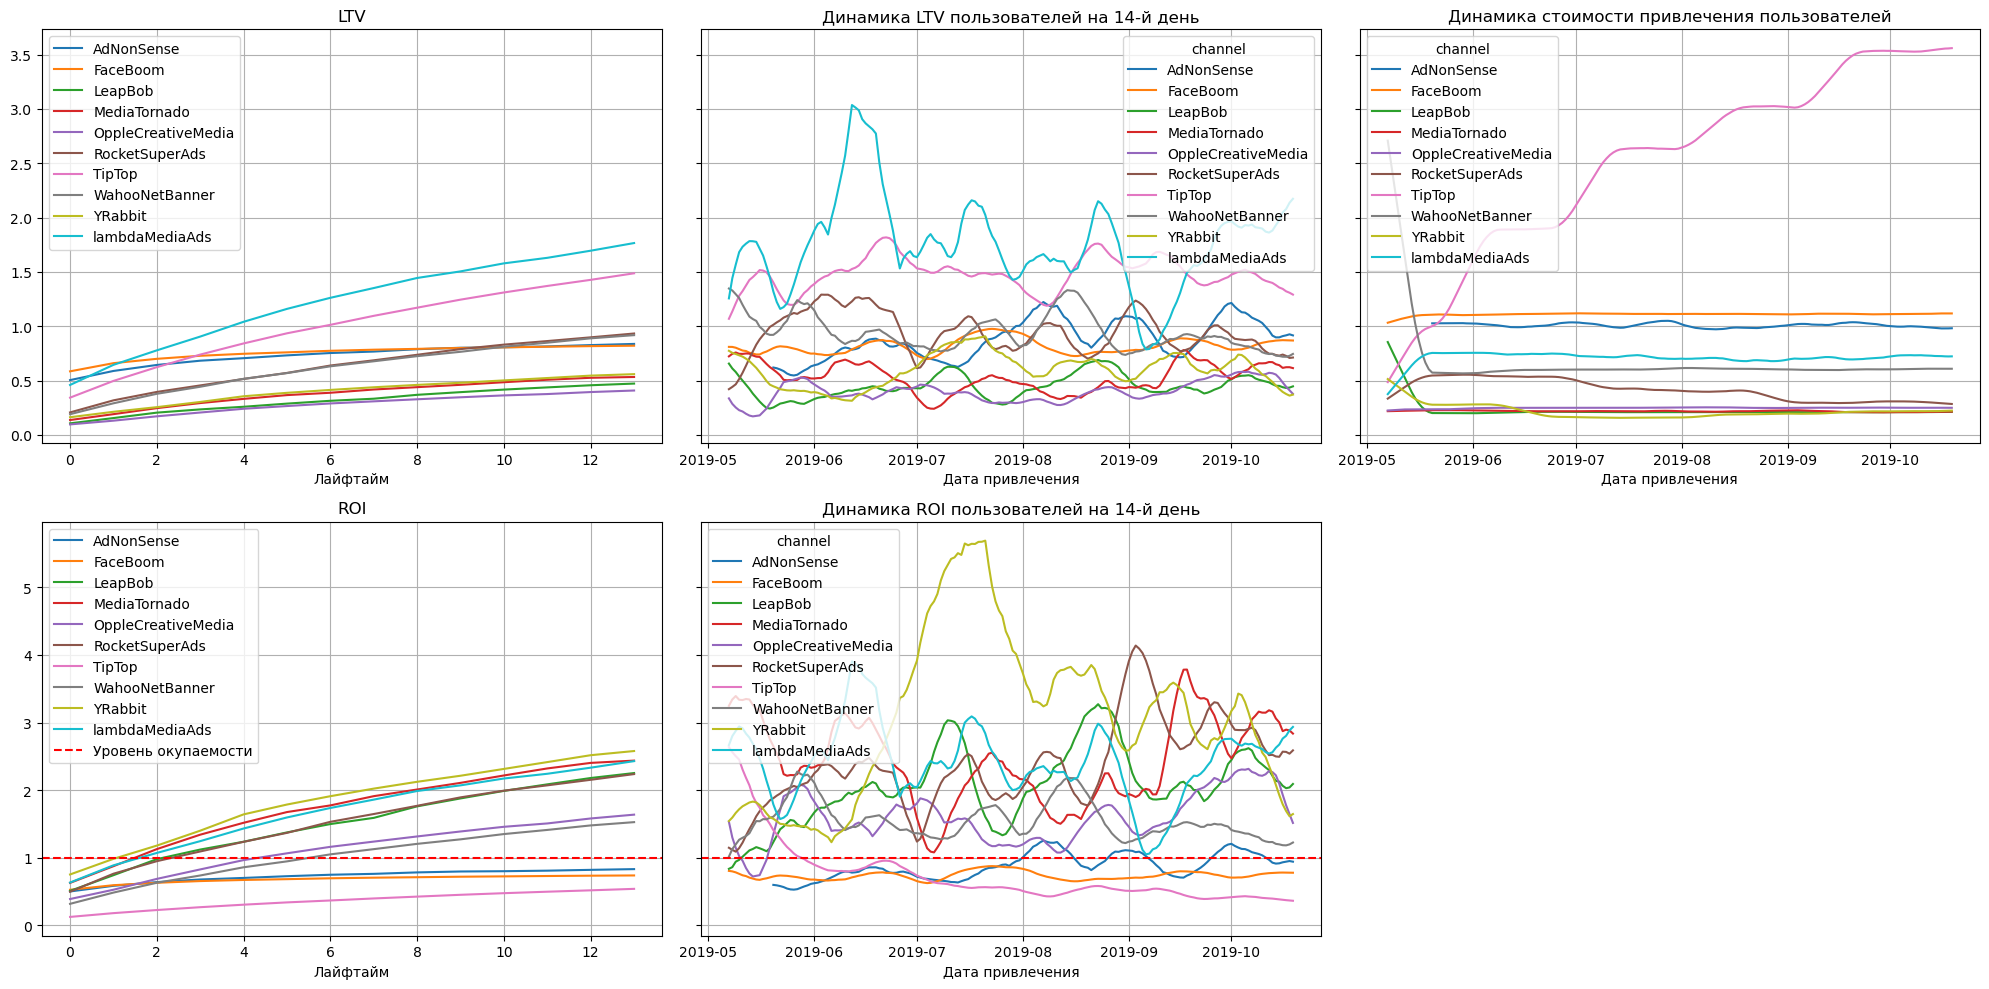

In [31]:
dimensions = ['channel']

ltv_raw, ltv, ltv_hist, roi, roi_hist = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv, filter_data(ltv_hist, 14), roi, filter_data(roi_hist, 14), horizon_days)

По каналам привлечения стабильно не окупаются пользователи *TipTop*, *FaceBoom* и *AdNonSense*. 

При этом стоимость привлечения пользователя на каналах *FaceBoom* и *AdNonSense* остается на одном уровне, а для канала *TipTop* непрерывно возрастает.

### 5.5 вывод

1. Общий график LTV показывает нормальный рост, то есть клиенты приносят деньги стабильно и проблема заключается не в привлечении покупателей.


2. Общий график САС показывает резкий рост в июне и к концу периода стоимость привлечения одного клиента вырастает в 2 раза по сравнению с начальным.


3. Общий график ROI демонстрирует, что за наблюдаемый период в целом реклама, направленная на привлечение пользователей, не окупилась (показатель достигает лишь 80%). Проблема с окупаемостью рекламы начинается в июне. 


4. Более детальный анализ по когортам показал, что проблема с окупаемостью касается не всех когорт пользователей, а конкретно:
- явно касается пользователей из США,
- в большей степени пользователей с устройствами *Mac* и *iPhone*,
- явно касается пользователей перешедших из источника *TipTop*. 

5. Однако, поскольку пользователи из США составляют треть всех клиентов, эта проблема критическим образом влияет на общие показатели.

## 6 Конверсия и удержание

### 6.1 общая конверсия

Изучим показатели конверсии.

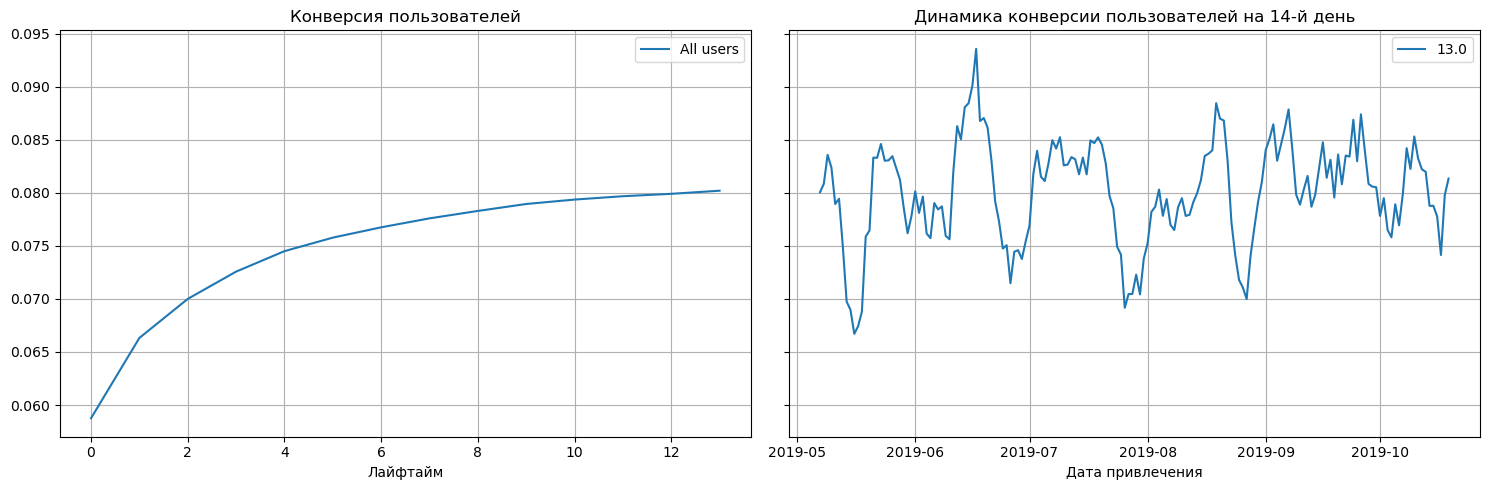

In [32]:
conversion_raw, conversion, conversion_hist = get_conversion(profiles, orders, observation_date, horizon_days)

plot_conversion(conversion, conversion_hist, horizon_days)

График конверсии пользователей выглядит нормально. Основной рост в первые 4 дня, затем замедление. Динамика конверсии к концу второй недели показывает сезонные колебания, но в целом редко опускается ниже значений 4-го дня.

### 6.2 конверсия по когортам

Посмотрим на показатели конверсии детальнее, по различным сегментам пользователей. 

Конверсия когорт по признаку ['region']


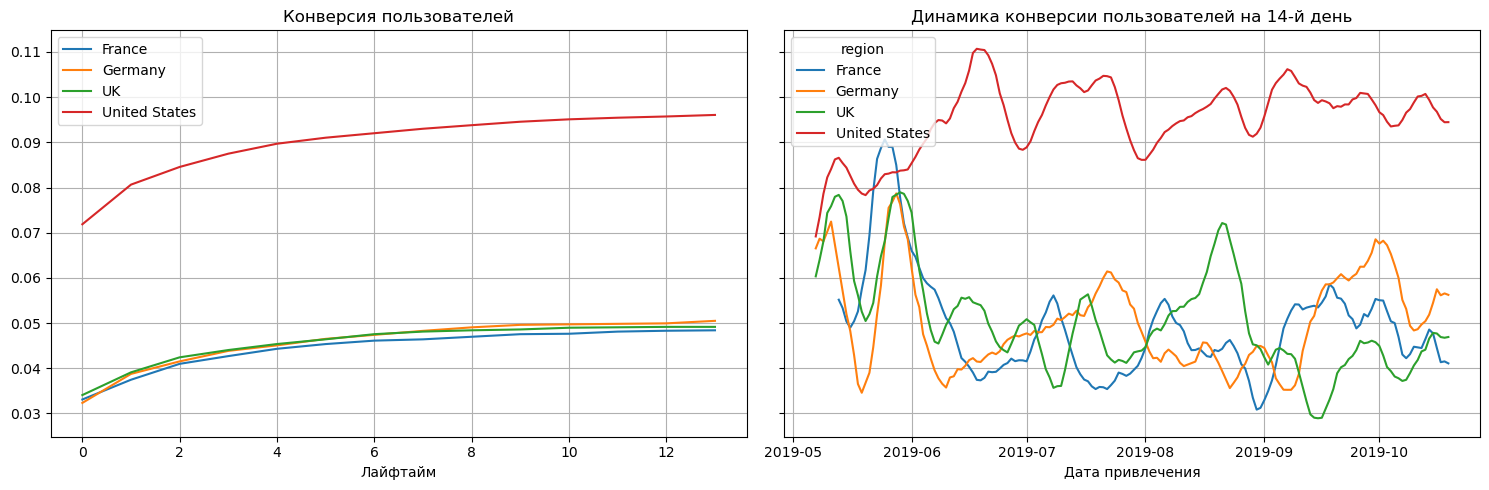

Конверсия когорт по признаку ['device']


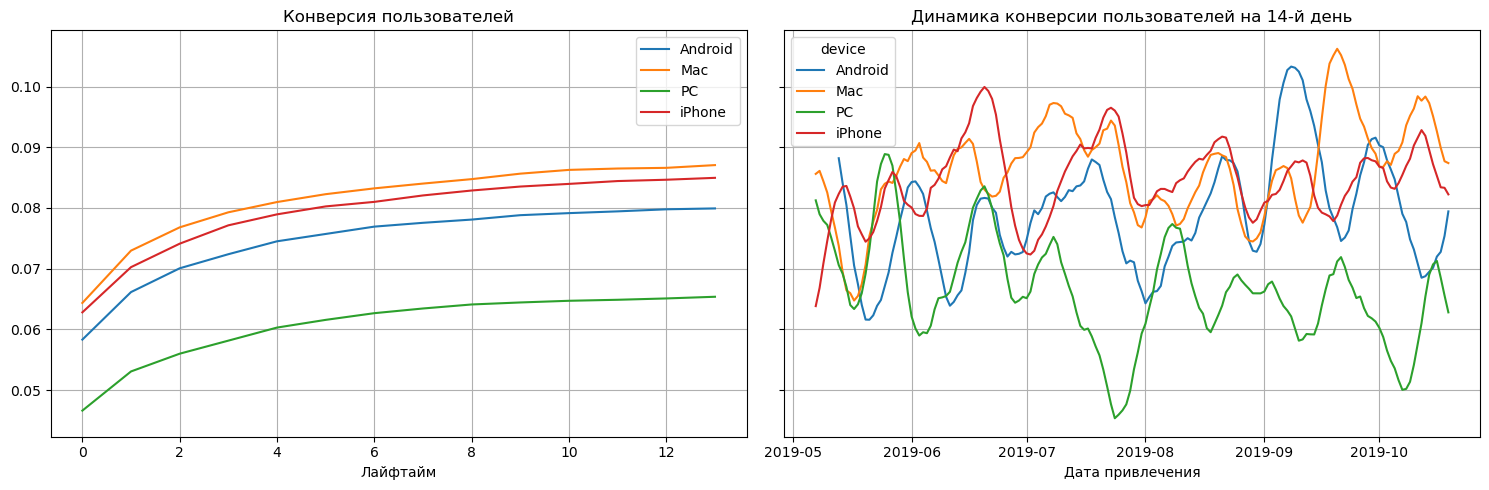

Конверсия когорт по признаку ['channel']


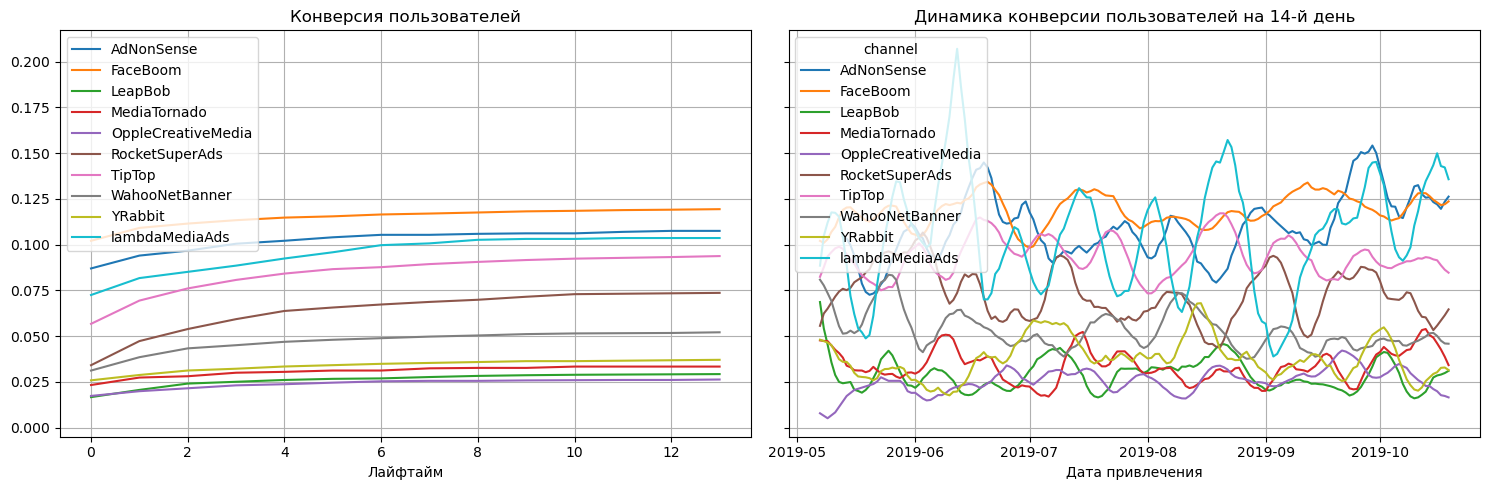

In [33]:
dimensions = [['region'], ['device'], ['channel']]

for item in dimensions:
    conversion_raw, conversion, conversion_hist = get_conversion(
        profiles, orders, observation_date, horizon_days, dimensions=item
    )
    print(f'Конверсия когорт по признаку {item}')
    plot_conversion(conversion, filter_data(conversion_hist, 7), horizon_days)

Конверсия пользователей из США значительно выше, чем пользователей других регионов. 

Конверсия пользователей PC — ниже, чем пользователей других устройств.

Лучшие показатели конверсии у пользователей, пришедших из каналов *FaceBoom*, *AdNonSense*, *IambdaMediaAds*, *TipTop*.

### 6.3 общее удержание

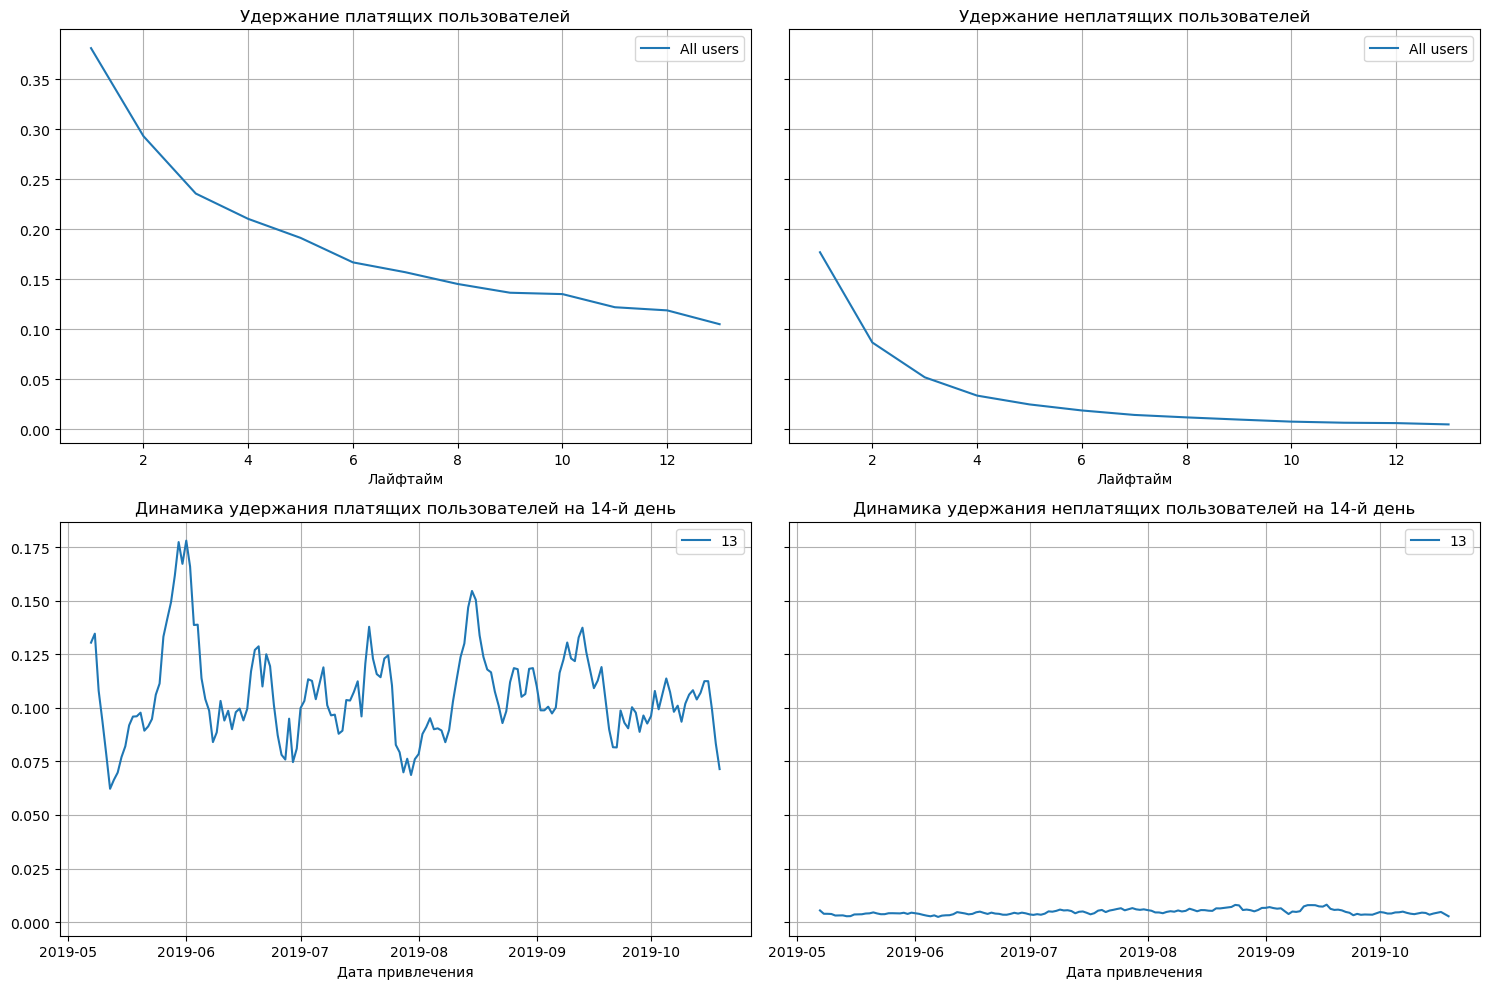

In [34]:
retention_raw, retention, retention_hist = get_retention(profiles, visits, observation_date, horizon_days)

plot_retention(retention, retention_hist, horizon_days)

Удержание платящих и неплятящих пользователей выглядит ожидаемым образом. Динамики удержания платящих и неплатящих пользователей тоже в целом выглядят ожидаемо. Динамика удержания показывает сезонность.

### 6.4 удержание по когортам

Аналогично посмотрим на показатели удержания детальнее, по различным сегментам пользователей.

Удержание когорт по признаку ['region']


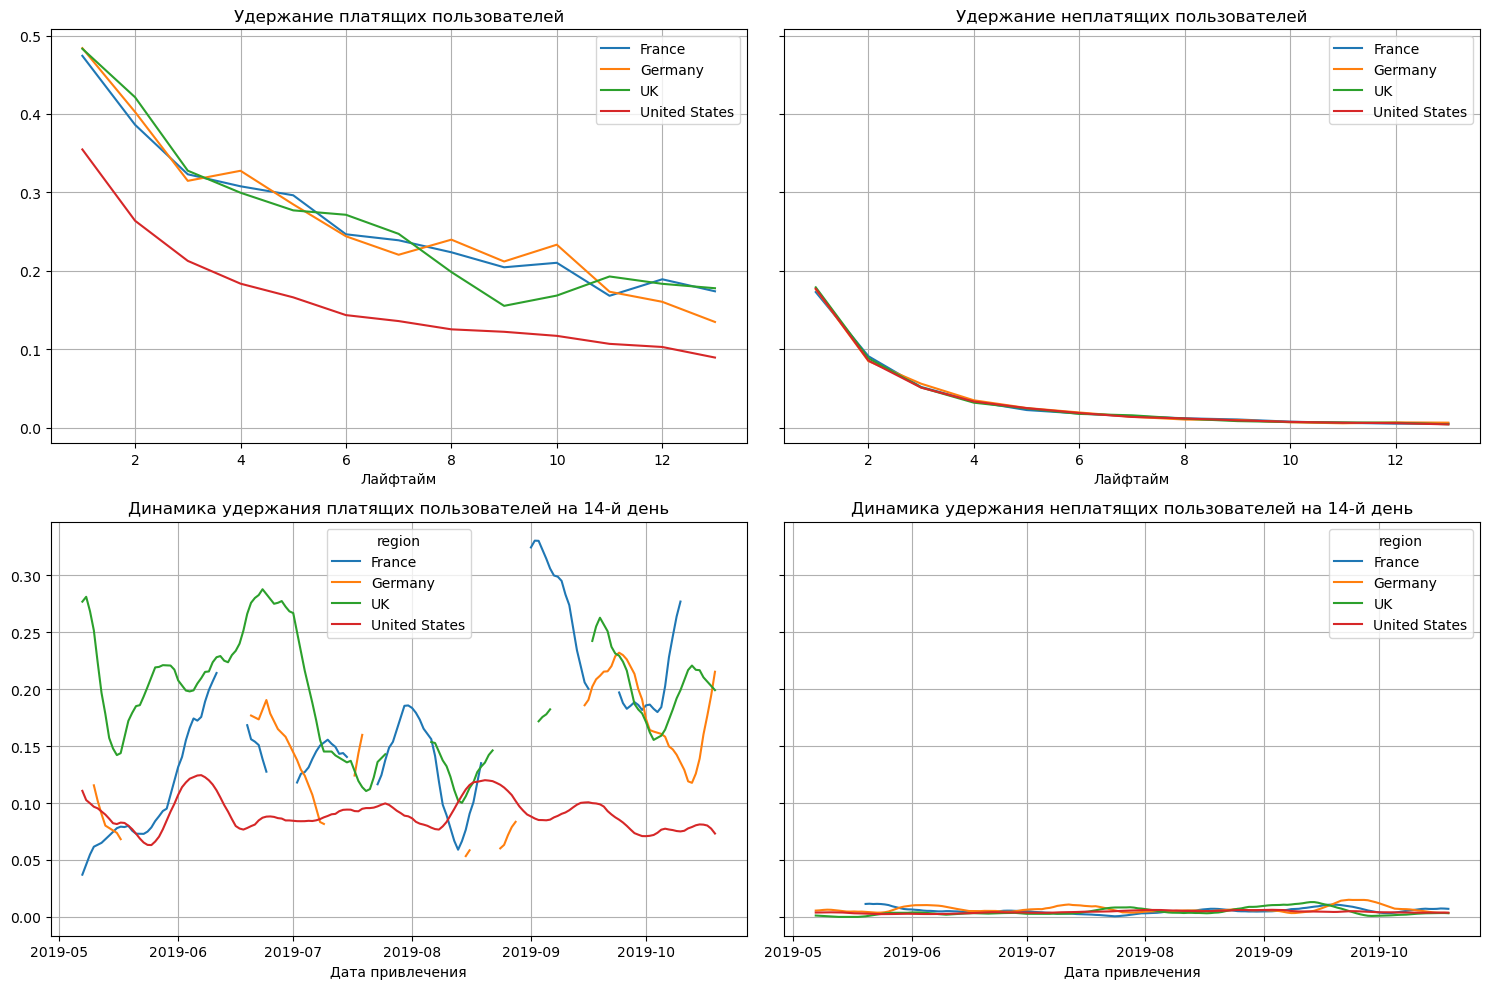

Удержание когорт по признаку ['device']


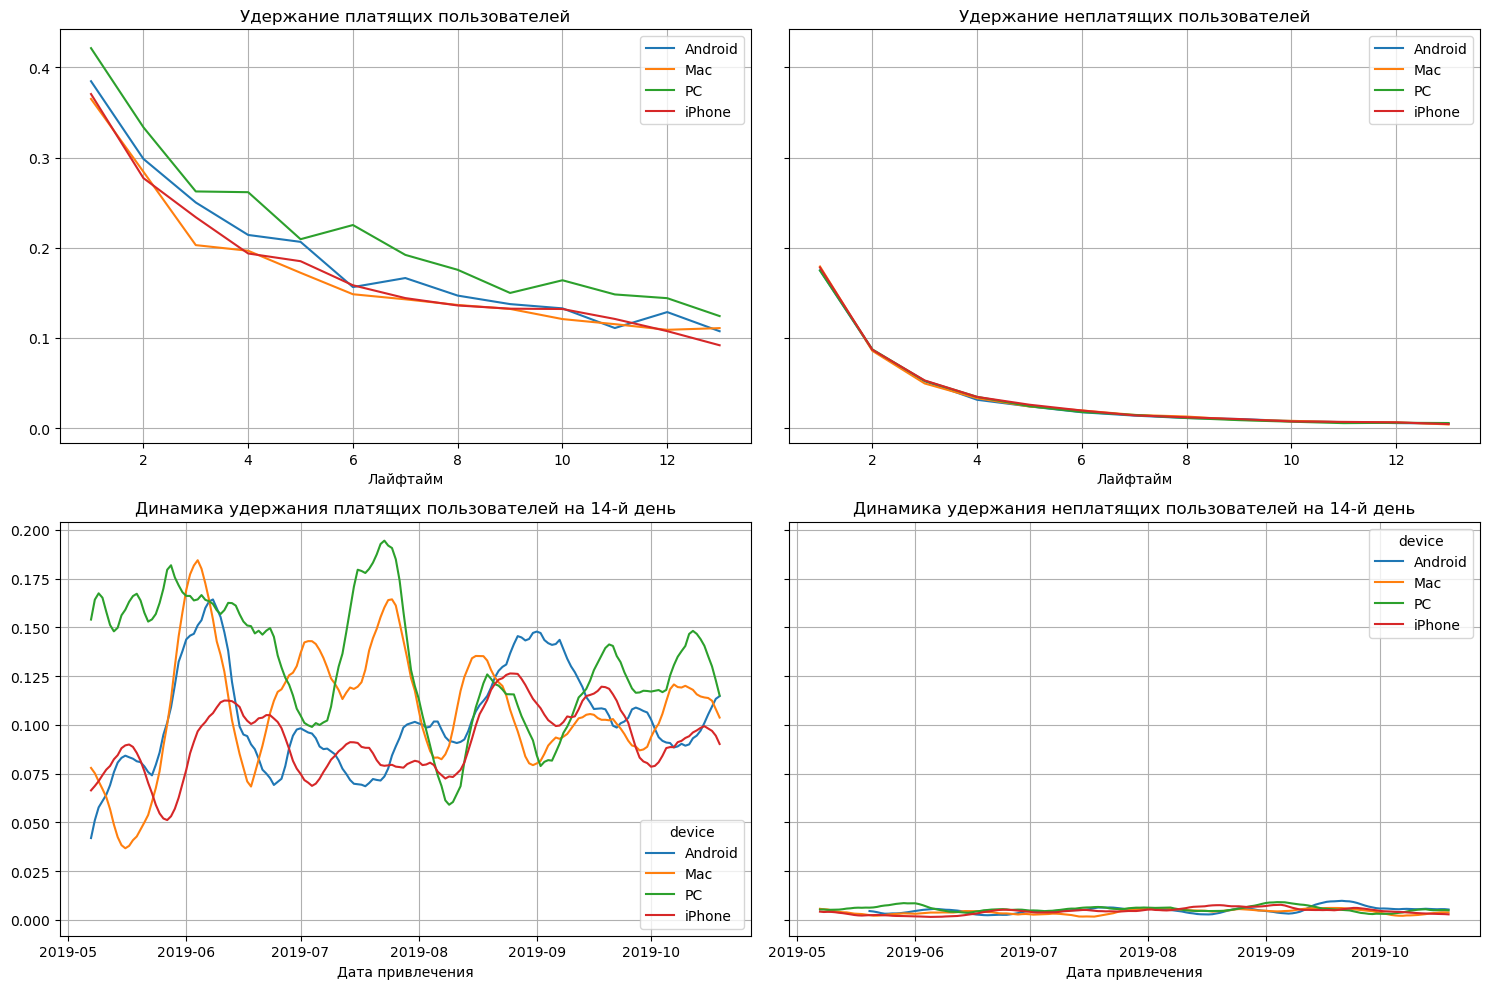

Удержание когорт по признаку ['channel']


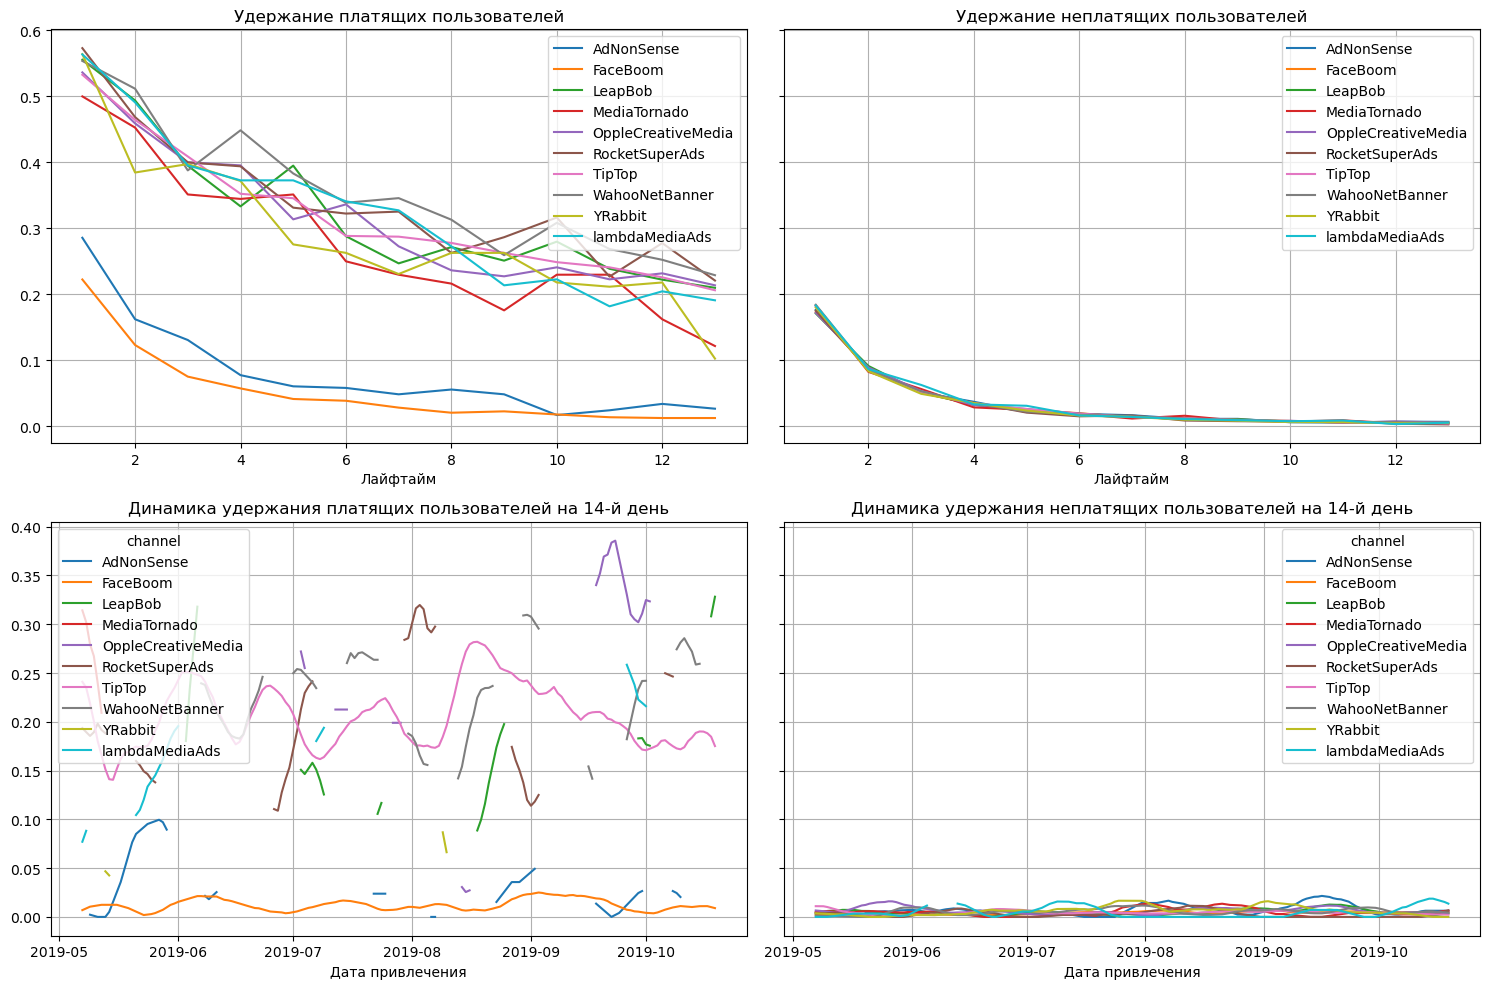

In [35]:
for item in dimensions:
    retention_raw, retention, retention_hist = get_retention(
        profiles, visits, observation_date, horizon_days, dimensions=item
    )
    print(f'Удержание когорт по признаку {item}')
    plot_retention(retention, filter_data(retention_hist, 14), horizon_days)

Показатели удержания неплатящих пользователей одинаковые по всем когортам.

Удержание пользователей из США хуже, чем пользователей из других стран.

Удержание когорт по устройствам за весь период в целом сопоставимо. Однако в динамике можно отметить, что на начало наблюдаемого периода показатели различались и у пользователей PC были лучше, а к концу наблюдаемого периода показатели  сравнялись.

Среди каналов привлечения по удержанию явно проигрывают 2 источника — *FaceBoom* и *AdNonSense*.

### 6.5 вывод

1. Общий график конверсии пользователей выглядит нормально. Основной рост происходит в первые 4 дня, динамика на 14 день показывает сезонные колебания, но в целом редко опускается ниже значений 4-го дня.


2. Анализ конверсии по когортам показывает:
- конверсия пользователей из США значительно выше, чем пользователей других регионов,
- конверсия пользователей PC — ниже, чем пользователей других устройств,
- лучшие показатели конверсии у пользователей, пришедших из каналов FaceBoom, AdNonSense, IambdaMediaAds, TipTop.

3. Общее удержание платящих и неплятящих пользователей выглядит нормально. Динамики удержания платящих и неплатящих пользователей тоже в целом выглядят ожидаемо. Динамика удержания платящих пользователей показывает сезонность.


4. Анализ удержания по когортам показывает:
- удержание пользователей из США хуже, чем пользователей из других стран,
- удержание когорт по устройствам за весь период в целом сопоставимо (в начале периода у PC были несколько лучше),
- явно проигрывают 2 источника привлечения — FaceBoom и AdNonSense.

5. Выявляется закономерность: лидеры конверсии по странам и каналам, наоборот, имеют проблемы с удержанием.

## 7 Уточняющие сопоставления

### 7.1 сопоставление США–Европа 

Поскольку проведенный анализ явно выделил проблемы пользователей одного региона — США, для ясности картины выведем графики укрупненных когорт — США и остальные регионы — по всем метрикам: окупаемость рекламы, конверсия, удержание.

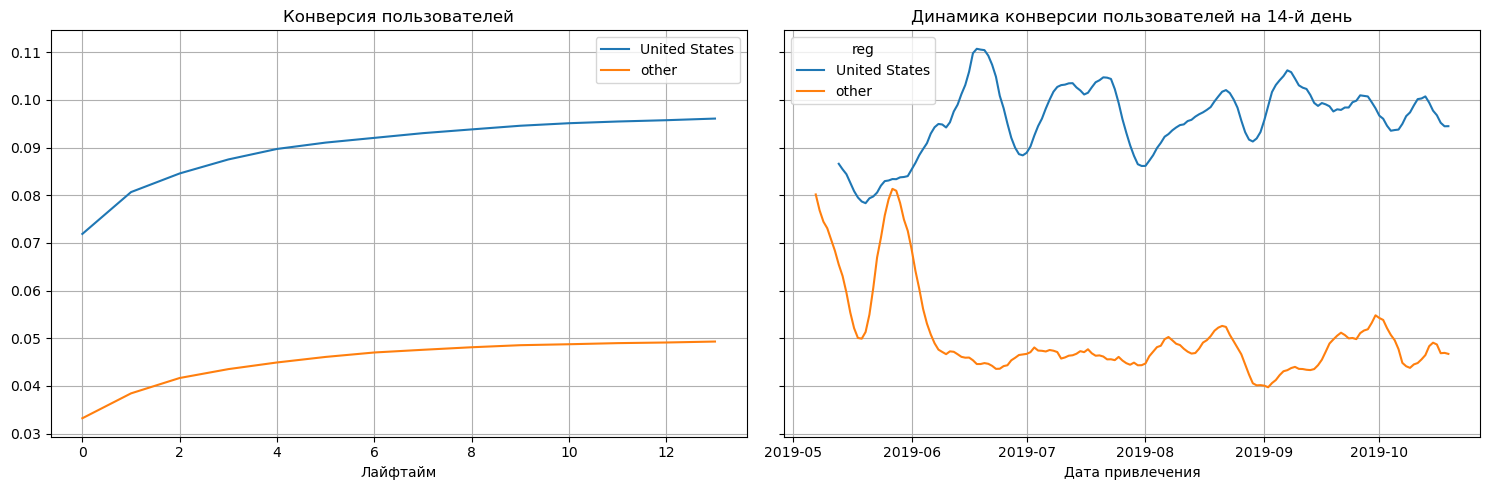

In [36]:
profiles['reg'] = profiles.query('region == "United States"')['region']
profiles['reg'] = profiles['reg'].fillna('other')

dimensions = ['reg']

conversion_raw, conversion, conversion_hist = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion, filter_data(conversion_hist, 7), horizon_days)

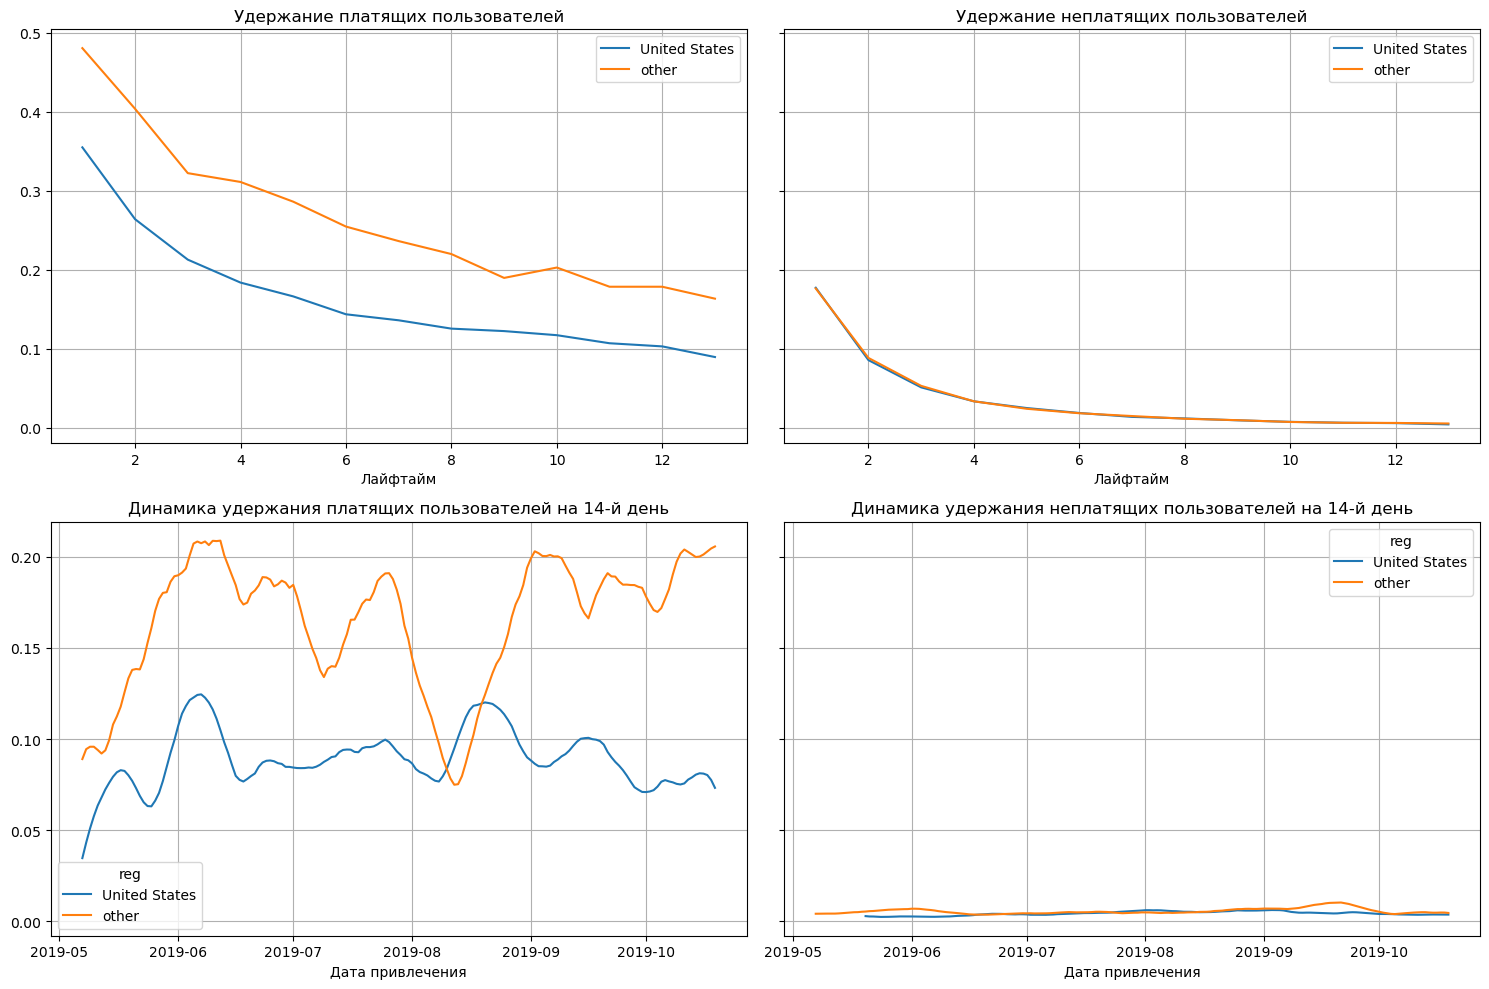

In [37]:
retention_raw, retention, retention_hist = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention, filter_data(retention_hist, 14), horizon_days)

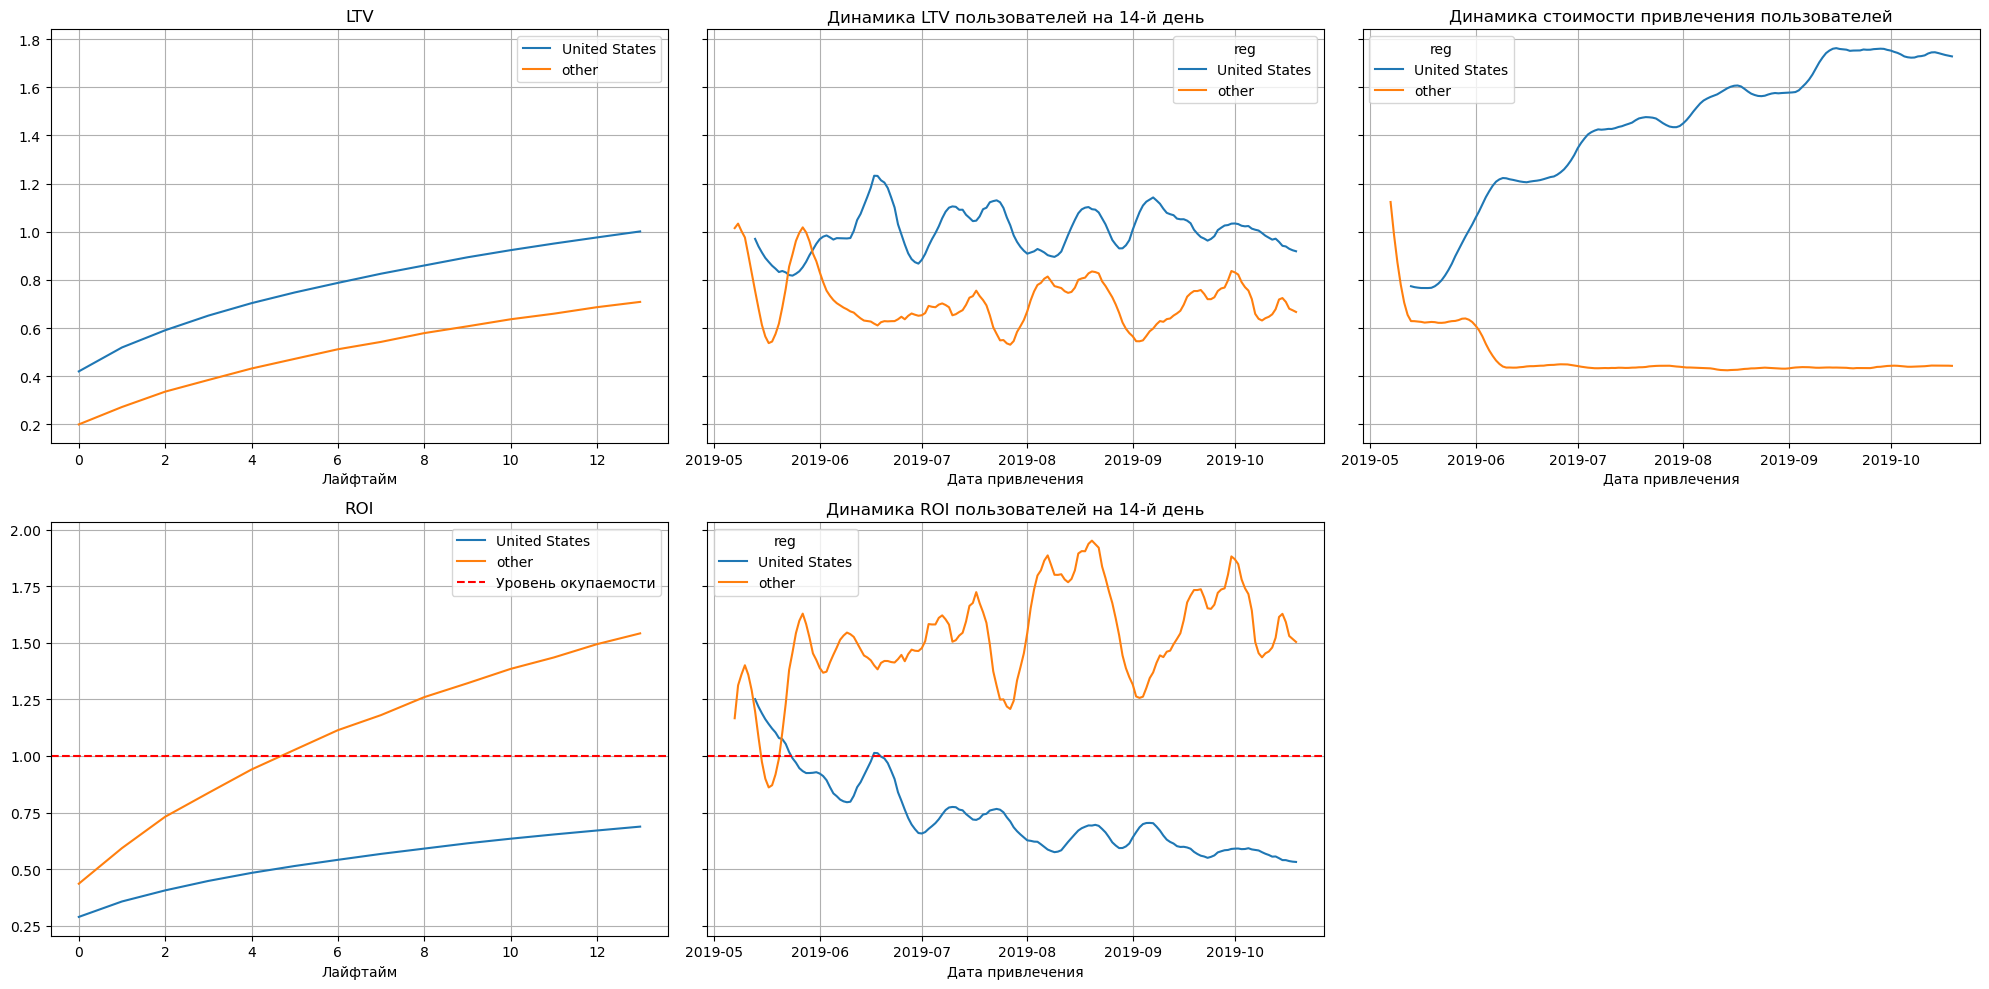

In [38]:
ltv_raw, ltv, ltv_hist, roi, roi_hist = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv, filter_data(ltv_hist, 7), roi, filter_data(roi_hist, 7), horizon_days)

Конверсия пользователей из США значительно лучше, чем пользователей из других регионов. Показатели удержания — хуже.

LTV пользователей из США примерно в 1,5 раза выше, чем пользователей из других регионов. Но при этом средний CAC выше в 4 раза и окупаемость не достигает 75%. Окупаемость пользователей других регионов достигается на 5 день и к концу второй недели составляет 150%.

### 7.2 связь «регион — канал привлечения»

Перед формулировкой выводов выведем таблицу по регионам и каналам привлечения.

In [39]:
profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='nunique')

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,NaN
FaceBoom,NaN,NaN,NaN,29144.0
LeapBob,2988.0,2519.0,3046.0,NaN
MediaTornado,NaN,NaN,NaN,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,NaN
RocketSuperAds,NaN,NaN,NaN,4448.0
TipTop,NaN,NaN,NaN,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,NaN
YRabbit,NaN,NaN,NaN,4312.0


Видим, что каналы привлечения для США и остальных регионов не совпадают.

### 7.3 вывод

При решении проблемы прежде всего нужно обратить внимание на следующее:
1. Изучить, какие изменения произошли в рекламной политике источника *TipTop* — более половины расходов рекламного бюджета идет на этот канал, при этом пользователи из него стабильно не окупаются и ни разу не окупались с начала июня.
2. Стоимость привлечения коснулась только пользователей из США. Значит не просто каналы *TipTop* и *FaceBoom* оказались неэффективными, а имеет смысл проверить, не существует ли технических препятствий в использовании продукта пользователями разных регионов.
3. Среди пользователей *PC* и *Android* доля покупателей меньше, но окупаемость сохраняется даже при общей картине неокупаемости. Необходимо проверить, не существует ли технических препятствий в использовании продукта пользователями *Mac* и *iPhone*.

## 8 Итог

1. Анализ показал, что с LTV пользователей нет никаких проблем ни в целом, ни при делении на когорты:
    - чуть хуже платят пользователи *PC*, чем пользователи других устройств,
    - лучше платят пользователи США, чем из других регионов,
    - лучше платят пришедшие из каналов *LambdaMediaAds* и *TipTop*, чем из других каналов,

— но в целом показатели LTV стабильные, слегка подвержены колебаниям с шагом примерно в месяц, находятся в одних и тех же пределах.

2. Причина неэффективности оказалась в высокой стоимости привлечения пользователей. CAC непрерывно возрастает начиная с июня и касается следующих категорий клиентов:
    - пользователей из США,
    - с устройствами Mac и iPhone,
    - перешедших из источника TipTop.


3. Рекомендации:
    - изучить изменения в рекламной политике источника TipTop, пересмотреть долю расходов в бюджете на этот канал,
    - проверить наличие технических препятствий в использовании продукта пользователями США,
    - проверить наличие технических препятствий в использовании продукта пользователями Mac и iPhone.